In [1]:
import pandas as pd


In [9]:
df = pd.read_csv('fixed_metrics.csv')


def determine_model(image_name):
    if pd.isna(image_name):
        return None
    image_name = str(image_name).lower()
    if 'dalle' in image_name:
        return 'dalle'
    elif 'kandinsky' in image_name:
        return 'kandinsky'
    elif 'imagen' in image_name:
        return 'imagen'
    elif 'sd_' in image_name:
        return 'sd'
    else:
        return None

df.head()
df['model'] = df['Image'].apply(determine_model)

# Write the DataFrame to a CSV file
df.to_csv('fixed_metrics_with_model.csv', index=False)


In [18]:
numcols = ['NIQE', 'BRISQUE', 'PIQE', 'MetaIQA','RankIQA', 'HyperIQA', 'Contrique', 'CNNIQA', 'TReS', 'CLIPIQA']

# Group by Region and calculate mean and std for numeric columns
region_mean = df.groupby('Region')[numcols].mean()
region_std = df.groupby('Region')[numcols].std()

# Combine mean and std in format "mean ± std"
region_combined = region_mean.copy()
for col in numcols:
    region_combined[col] = region_mean[col].round(2).astype(str) + " ± " + region_std[col].round(2).astype(str)

# Reset index for display
region_aggregated = region_combined.reset_index()

# Also keep the original mean values for potential calculations
region_aggregated_mean = region_mean.reset_index()

# Display the aggregated data
print("Aggregated metrics by Region (mean ± std):")
region_aggregated.head()

# Optionally, save the aggregated data to a CSV file
# region_aggregated.to_csv('region_aggregated_metrics.csv', index=False)


Aggregated metrics by Region (mean ± std):


,Region,NIQE,BRISQUE,PIQE,MetaIQA,RankIQA,HyperIQA,Contrique,CNNIQA,TReS,CLIPIQA
0,Africa,5.69 ± 2.4,15.97 ± 14.56,10.0 ± 11.15,0.47 ± 0.14,2.56 ± 2.2,65.29 ± 6.07,70.52 ± 12.19,8947.08 ± 31711.3,74.81 ± 17.5,0.85 ± 0.14
1,Asia,5.89 ± 2.23,19.52 ± 15.04,11.2 ± 11.18,0.47 ± 0.15,3.3 ± 2.28,64.55 ± 6.67,69.34 ± 13.13,10683.57 ± 36707.55,72.27 ± 18.46,0.79 ± 0.16
2,Europe,6.14 ± 1.82,22.41 ± 15.6,12.76 ± 10.15,0.47 ± 0.16,3.26 ± 2.36,65.89 ± 6.77,68.45 ± 12.58,19778.28 ± 41016.52,74.6 ± 19.51,0.79 ± 0.15
3,North America,6.55 ± 2.01,25.36 ± 19.02,14.02 ± 11.83,0.46 ± 0.15,3.47 ± 2.34,66.92 ± 6.43,67.58 ± 12.23,18991.71 ± 38639.03,76.35 ± 18.46,0.77 ± 0.17
4,South America,5.78 ± 1.67,18.02 ± 15.5,11.08 ± 10.29,0.45 ± 0.15,2.69 ± 2.16,66.04 ± 6.22,72.0 ± 12.26,17130.18 ± 36719.96,76.13 ± 15.73,0.82 ± 0.15


Aggregated metrics by Model and Region (mean ± std):


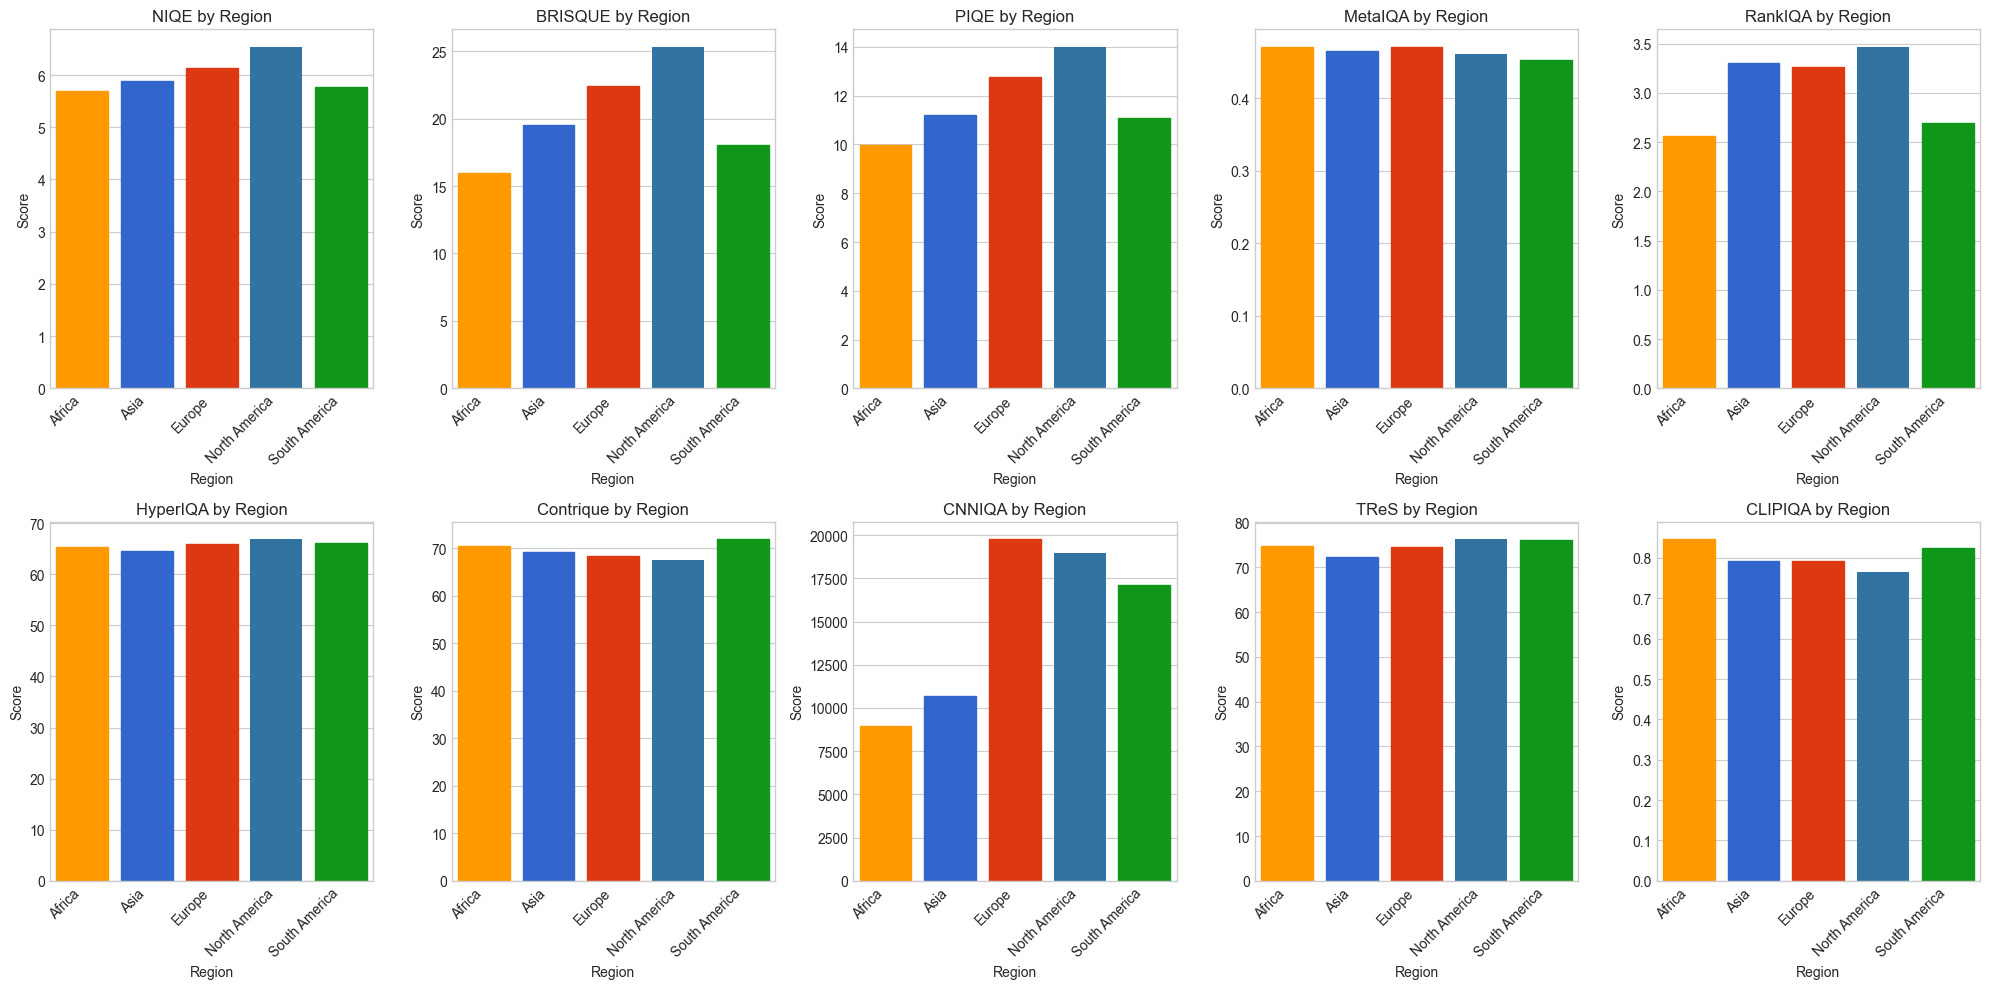

<Figure size 1200x600 with 0 Axes>

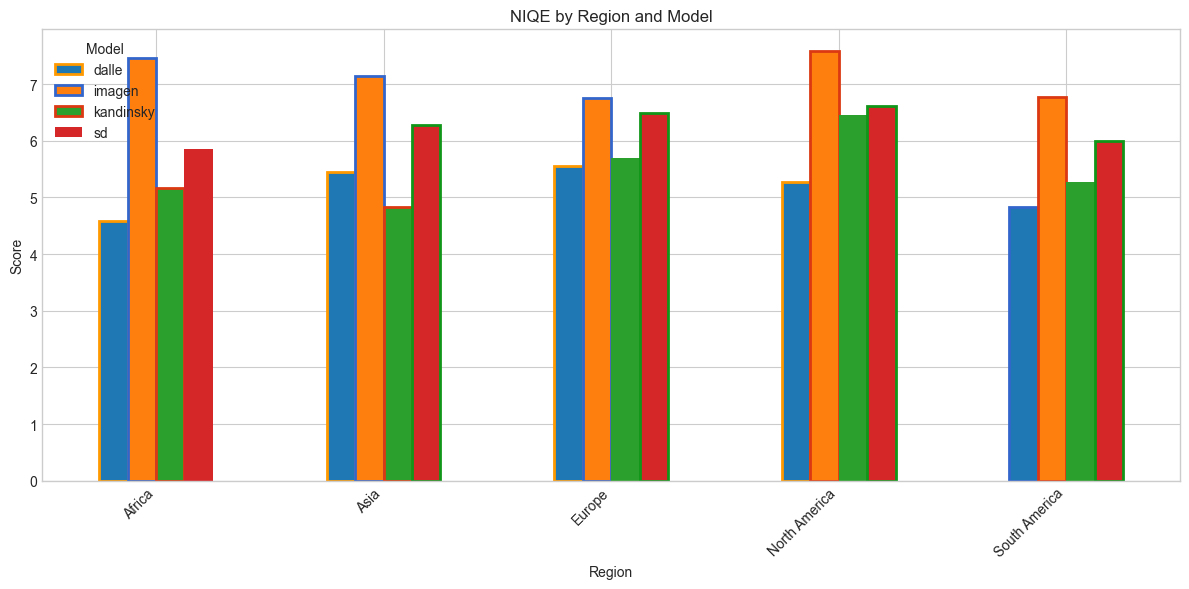

<Figure size 1200x600 with 0 Axes>

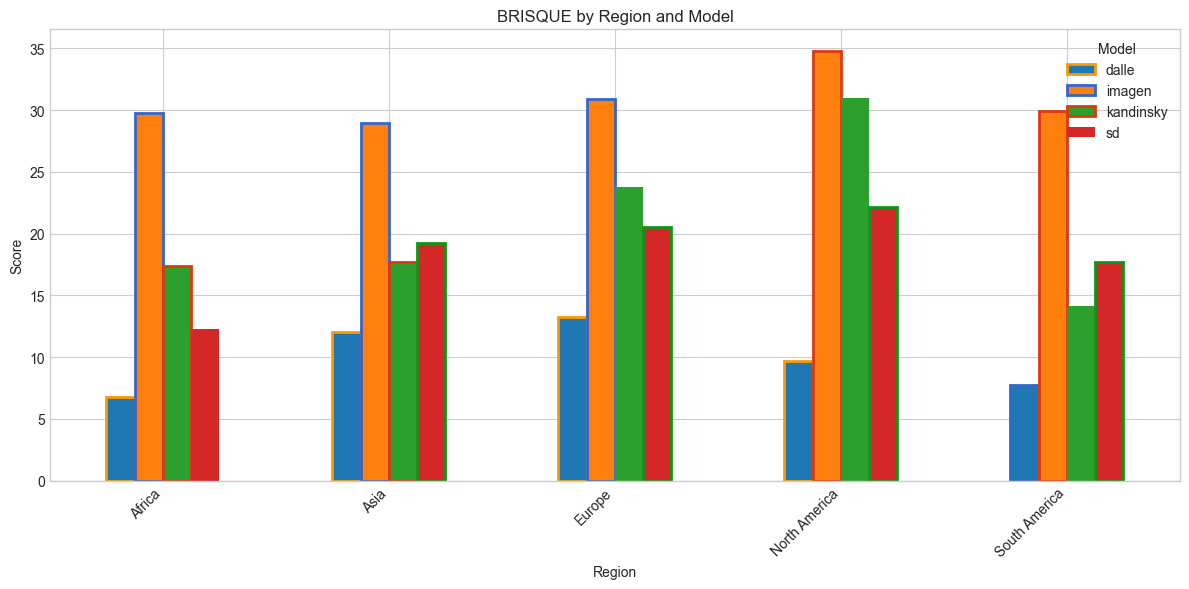

<Figure size 1200x600 with 0 Axes>

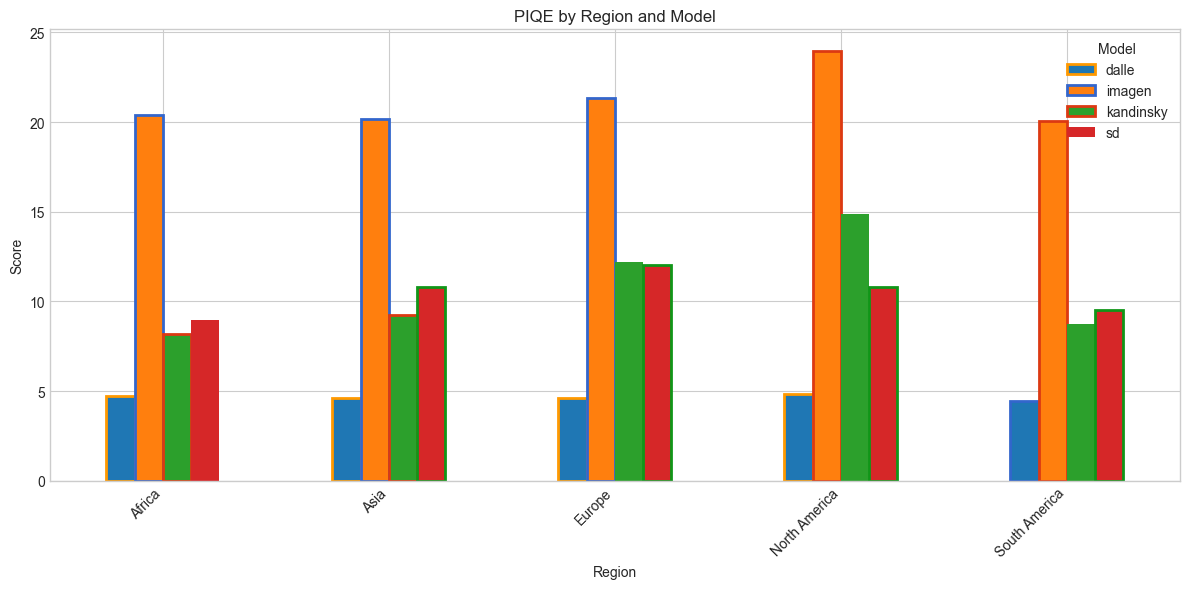

<Figure size 1200x600 with 0 Axes>

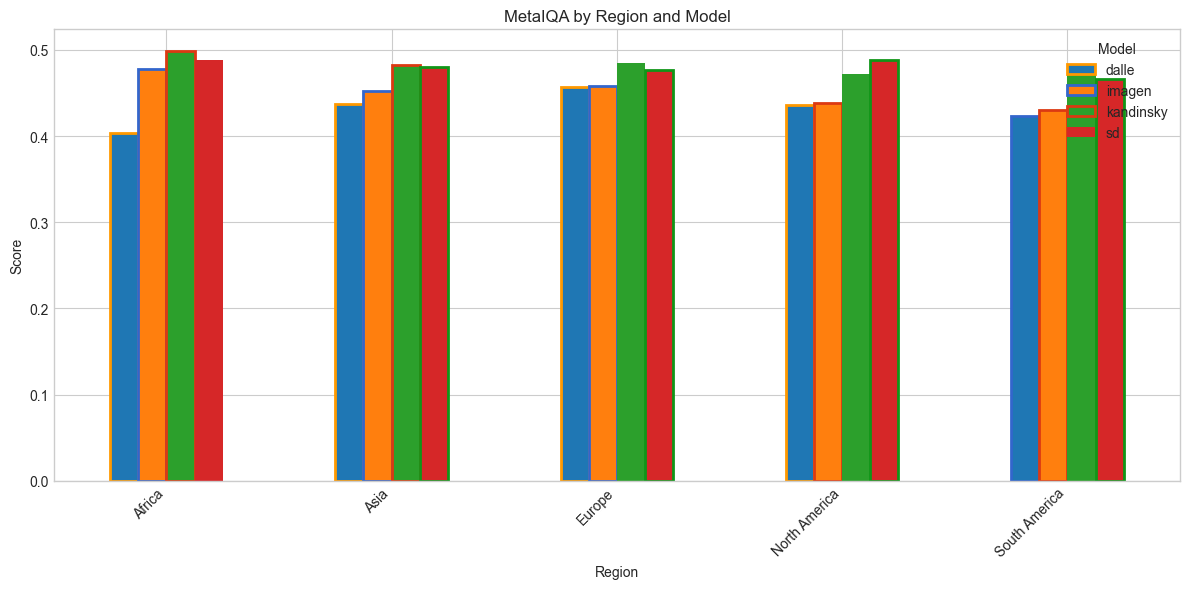

<Figure size 1200x600 with 0 Axes>

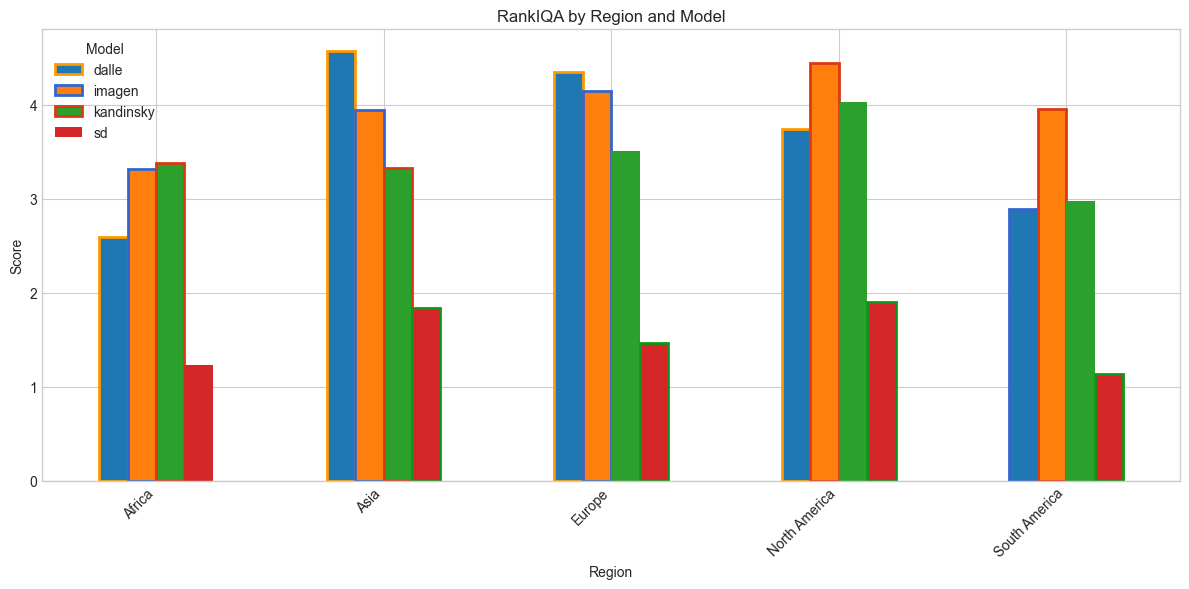

<Figure size 1200x600 with 0 Axes>

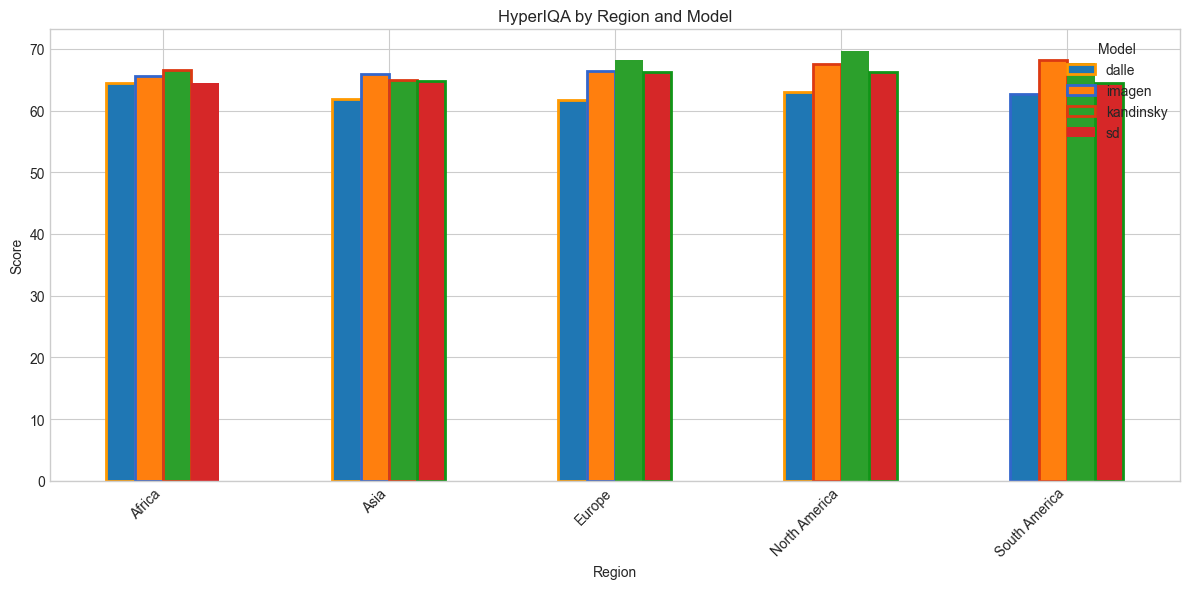

<Figure size 1200x600 with 0 Axes>

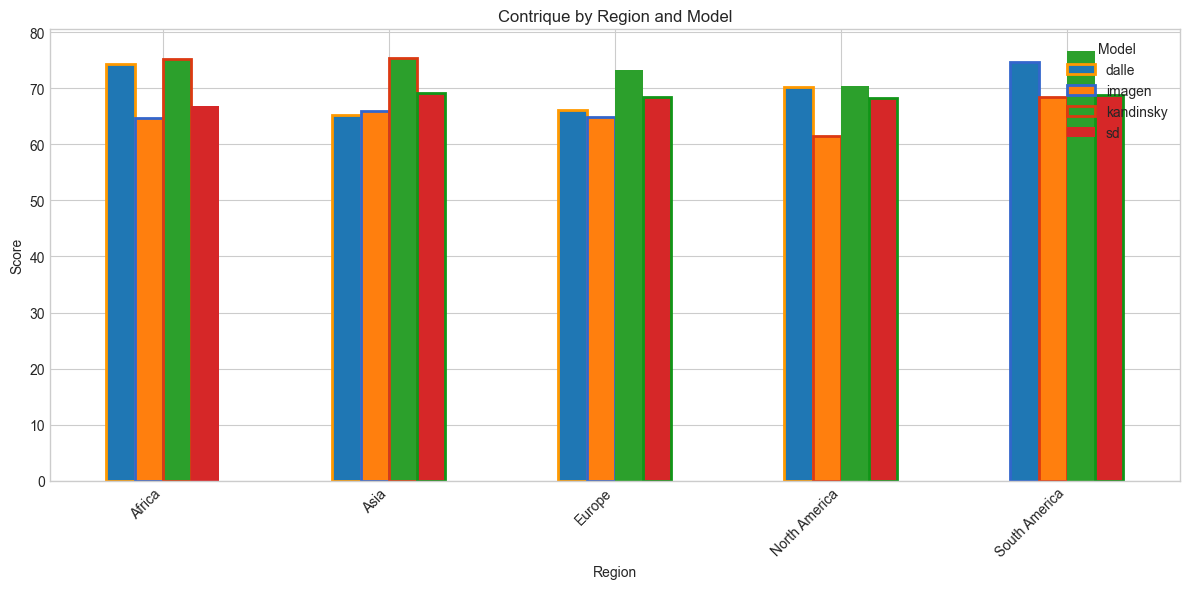

<Figure size 1200x600 with 0 Axes>

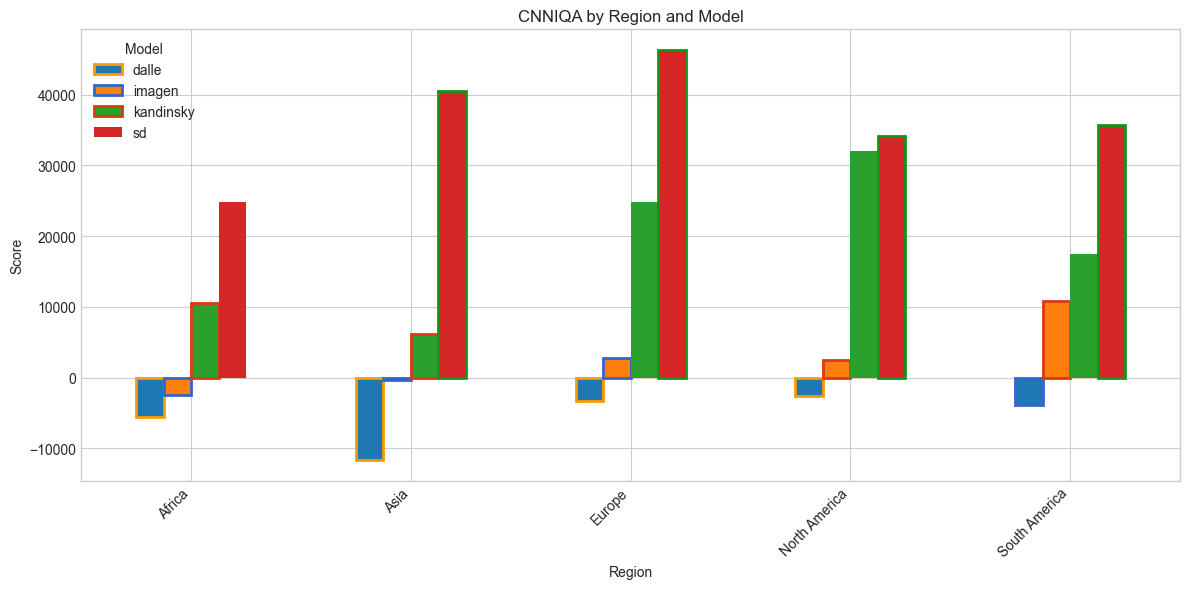

<Figure size 1200x600 with 0 Axes>

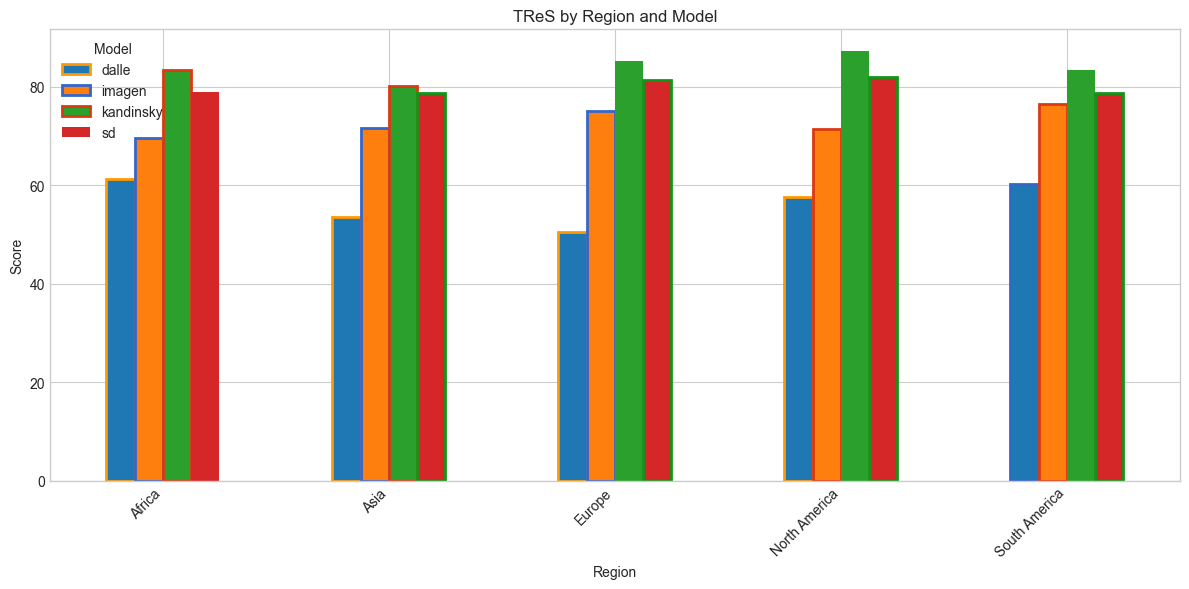

<Figure size 1200x600 with 0 Axes>

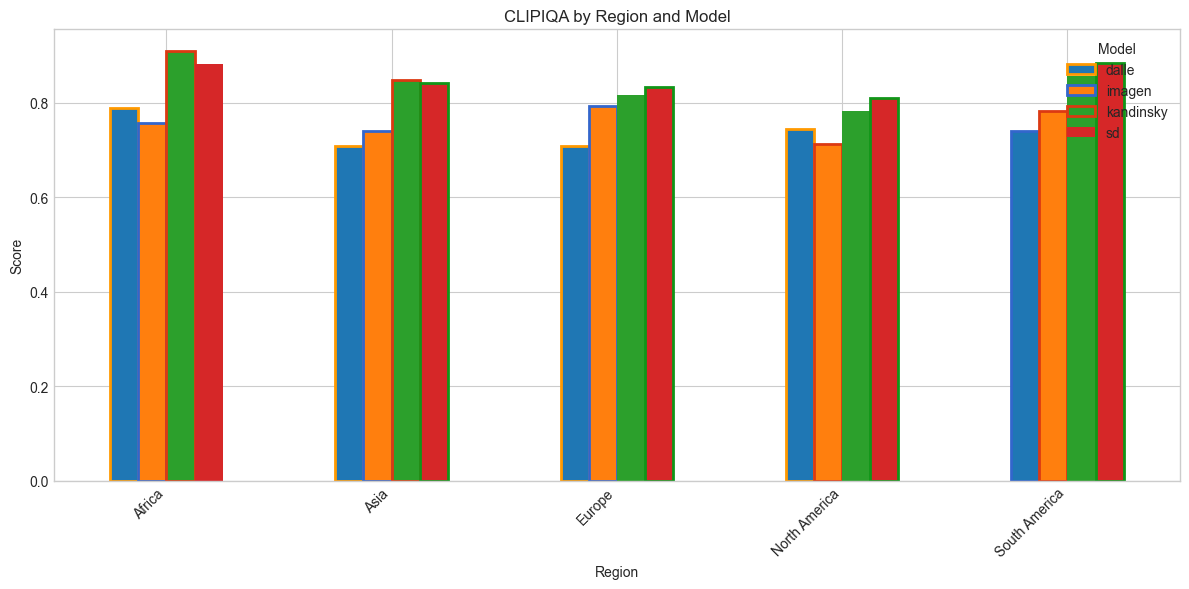

In [23]:
numcols = ['NIQE', 'BRISQUE', 'PIQE', 'MetaIQA','RankIQA', 'HyperIQA', 'Contrique', 'CNNIQA', 'TReS', 'CLIPIQA']

# Group by Model and Region, then calculate mean and std for numeric columns
model_region_mean = df.groupby(['model', 'Region'])[numcols].mean()
model_region_std = df.groupby(['model', 'Region'])[numcols].std()

# Combine mean and std in format "mean ± std"
model_region_combined = model_region_mean.copy()
for col in numcols:
    model_region_combined[col] = model_region_mean[col].round(2).astype(str) + " ± " + model_region_std[col].round(2).astype(str)

# Reset index for display
model_region_aggregated = model_region_combined.reset_index()

# Also keep the original mean values for potential calculations
model_region_aggregated_mean = model_region_mean.reset_index()

# Display the aggregated data
print("Aggregated metrics by Model and Region (mean ± std):")
model_region_aggregated.head()

# Optionally, save the aggregated data to a CSV file
# model_region_aggregated.to_csv('model_region_aggregated_metrics.csv', index=False)

# Create a bar chart to visualize metrics by region
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
region_colors = {
    'Africa': '#FF9900',
    'Asia': '#3366CC',
    'Europe': '#DC3912',
    'South America': '#109618',
    'Australia': '#990099',
    'Middle East': '#0099C6',
    'Central America': '#DD4477',
    'Caribbean': '#66AA00',
    'Pacific Islands': '#B82E2E',
    'Antarctica': '#316395'
}

# Set the style for the plots
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

# For each metric, create a bar plot
for i, metric in enumerate(numcols):
    # Extract the mean values for plotting
    plot_data = region_aggregated_mean[['Region', metric]].copy()
    
    # Create the bar plot
    bars = sns.barplot(x='Region', y=metric, data=plot_data, ax=axes[i])
    
    # Apply region colors to bars
    for j, bar in enumerate(bars.patches):
        region = plot_data.iloc[j]['Region']
        if region in region_colors:
            bar.set_color(region_colors[region])
    
    # Add title and labels
    axes[i].set_title(f'{metric} by Region')
    axes[i].set_xlabel('Region')
    axes[i].set_ylabel('Score')
    
    # Fix the x-axis ticks first, then set the labels
    # Get current tick positions
    locs = axes[i].get_xticks()
    # Set fixed tick positions
    axes[i].set_xticks(locs)
    # Now set the labels with rotation
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()

# Create a similar visualization for model-region data
# This will create a grouped bar chart for each metric, showing different models by region
for metric in numcols:
    plt.figure(figsize=(12, 6))
    
    # Pivot the data to get models as columns and regions as rows
    pivot_data = model_region_aggregated_mean.pivot(index='Region', columns='model', values=metric)
    
    # Plot the data
    ax = pivot_data.plot(kind='bar', figsize=(12, 6))
    
    # Apply region colors to bars
    for i, region in enumerate(pivot_data.index):
        if region in region_colors:
            # Get the bars for this region (one for each model)
            bars = [patch for j, patch in enumerate(ax.patches) if j // len(pivot_data.columns) == i]
            for bar in bars:
                bar.set_edgecolor(region_colors[region])
                bar.set_linewidth(2)
    
    # Add title and labels
    plt.title(f'{metric} by Region and Model')
    plt.xlabel('Region')
    plt.ylabel('Score')
    plt.legend(title='Model')
    
    # Fix the x-axis ticks and labels
    locs = ax.get_xticks()
    ax.set_xticks(locs)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()
